In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('FINAL DATA - Sheet1.csv')

In [3]:
data.iloc[1:5,:]

,AllFuelsGen,CoalGen,PetroleumGen,NatGasGen,OtherGasGen,NuclearGen,HydroGen,RenewablesGen,HydroStorageGen,OtherGen,GeothermalGen,IndepGen,GDP,AvgTemp,AvgMaxTemp,AvgRelHum,Price,HydroCons,GeoCons,SolarCons,WindCons,WoodCons,WasteCons,BiofuelsCons,BiomassCons,RenCons,NatGasPrice,ResNatGasPrice,CommNatGasPrice,IndNatGasPrice,ElecPowerNatGasPrice,ElecPowerElecNetGen,CommElecNetGen,IndElecNetGen,TotElecNetGen,ElecImports,ElecExports,ElecNetImports,TDLosses,RetailElecSales,DirectElecUse,EndElecUse,ResPrice,CommPrice,IndPrice,AvgRetailPrice,ResNatGasCons,CommNatGasCons,IndLPNatGasCons,OtherIndNatGasCons,OtherNonCHPIndNatGasCons,TotIndOtherNatGasCons,TotIndNatGasCons,PDTransNatGasCons,FuelTransNatGasCons,TotTransNatGasCons,ElecPowerNatGasCons,TotNatGasCons,ElecCoalCons,ElecNatGasCons,TotRetailElecSales,TotCoalCons,CA_GDP,CoalCap,LargeHydroCap,NatGasCap,NuclearCap,OilCap,BiomassCap,GeothermalCap,SmallHydroCap,SolarPVCap,SolarThermalCap,WindCap,TotalElecCap
1,14380.39,184.14,175.65,8870.58,101.84,2229.87,1290.01,1504.66,-172.96,17.30,951.16,951.21,1637.15,50.04,57.29,71.37,9.63,180.55,12.81,3.40,4.46,155.97,27.21,20.08,203.26,404.48,7.08,10.26,9.80,7.21,7.18,270.97,0.55,11.42,282.94,3.32,2.85,0.46,-1.35,272.32,12.43,284.76,8.04,7.51,4.81,6.87,780.48,422.41,86.82,98.42,541.61,640.03,726.85,65.77,1.12,66.89,312.84,2309.46,82.33,82259.19,18305.56,138.33,1637.15,429.0,11836.75,30567.83,4456.0,563.08,1142.67,2624.83,1750.42,2.0,407.33,1534.83,55540.83
2,15848.63,102.50,119.55,9474.18,103.13,2468.63,1764.77,1788.32,-152.66,16.49,1052.63,1052.67,1636.24,56.12,67.10,77.43,9.89,211.59,14.21,4.83,5.50,168.14,30.32,21.55,220.01,456.13,6.10,9.85,9.14,6.30,5.91,287.70,0.55,12.45,300.71,3.53,1.79,1.73,19.62,269.32,13.51,282.83,8.32,7.70,4.87,7.01,681.88,375.69,96.44,107.76,557.16,664.92,761.36,63.63,1.24,64.86,362.84,2246.63,43.27,87836.61,21351.41,108.27,1636.24,429.0,11825.50,30760.67,4456.0,561.17,1142.33,2624.67,1749.83,2.0,404.67,1535.67,55717.67
3,15841.02,205.59,90.02,9208.77,92.26,2318.67,2096.46,1797.49,-143.87,13.42,966.04,966.08,1635.32,54.87,65.57,72.80,9.88,186.13,13.16,5.37,7.08,163.97,30.12,18.71,212.80,424.53,6.30,10.16,9.01,6.08,5.82,265.86,0.55,11.67,278.08,3.79,1.42,2.38,13.43,254.33,12.70,267.02,8.46,7.73,4.87,7.02,400.73,255.36,92.60,100.58,521.48,622.05,714.66,50.74,1.20,51.93,384.49,1807.17,90.97,84775.23,18855.60,155.97,1635.32,429.0,11814.25,30953.50,4456.0,559.25,1142.00,2624.50,1749.25,2.0,402.00,1536.50,55894.50
4,16874.50,200.48,103.19,9698.87,108.04,1667.93,3045.22,1831.97,34.61,16.19,960.34,960.37,1634.40,66.45,81.29,72.58,9.82,198.14,12.98,6.32,6.56,161.46,29.83,19.58,210.86,434.87,5.77,11.14,9.19,5.46,5.29,288.17,0.58,11.75,300.49,4.42,1.55,2.87,26.11,264.44,12.80,277.25,8.83,7.77,5.00,7.17,209.33,164.15,94.98,103.46,473.07,576.53,671.51,42.24,1.24,43.47,433.92,1522.38,86.68,87603.94,19862.26,149.68,1634.40,429.0,11803.00,31146.33,4456.0,557.33,1141.67,2624.33,1748.67,2.0,399.33,1537.33,56071.33


In [4]:
data.shape

(199, 75)

In [5]:
feature_gen = [x for x in data.columns.tolist()  if 'Gen' in x] # Generation?
feature_gen

['AllFuelsGen',
 'CoalGen',
 'PetroleumGen',
 'NatGasGen',
 'OtherGasGen',
 'NuclearGen',
 'HydroGen',
 'RenewablesGen',
 'HydroStorageGen',
 'OtherGen',
 'GeothermalGen',
 'IndepGen',
 'ElecPowerElecNetGen',
 'CommElecNetGen',
 'IndElecNetGen',
 'TotElecNetGen']

In [6]:
feature_cons = [x for x in data.columns.tolist()  if 'Cons' in x ] # Consumption?
feature_cons

['HydroCons',
 'GeoCons',
 'SolarCons',
 'WindCons',
 'WoodCons',
 'WasteCons',
 'BiofuelsCons',
 'BiomassCons',
 'RenCons',
 'ResNatGasCons',
 'CommNatGasCons',
 'IndLPNatGasCons',
 'OtherIndNatGasCons',
 'OtherNonCHPIndNatGasCons',
 'TotIndOtherNatGasCons',
 'TotIndNatGasCons',
 'PDTransNatGasCons',
 'FuelTransNatGasCons',
 'TotTransNatGasCons',
 'ElecPowerNatGasCons',
 'TotNatGasCons',
 'ElecCoalCons',
 'ElecNatGasCons',
 'TotCoalCons']

In [7]:
feature_price = [x for x in data.columns.tolist()  if 'Price' in x ]
feature_price

['Price',
 'NatGasPrice',
 'ResNatGasPrice',
 'CommNatGasPrice',
 'IndNatGasPrice',
 'ElecPowerNatGasPrice',
 'ResPrice',
 'CommPrice',
 'IndPrice',
 'AvgRetailPrice']

In [8]:
feature_cap = [x for x in data.columns.tolist()  if 'Cap' in x ]
feature_cap

['CoalCap',
 'LargeHydroCap',
 'NatGasCap',
 'NuclearCap',
 'OilCap',
 'BiomassCap',
 'GeothermalCap',
 'SmallHydroCap',
 'SolarPVCap',
 'SolarThermalCap',
 'WindCap',
 'TotalElecCap']

In [9]:
Other_features = ['GDP',
                  'AvgTemp',
                  'AvgMaxTemp',
                  'AvgRelHum',
                  'ElecImports',
                  'ElecExports',
                  'TDLosses', # Vad ar det?
                  'RetailElecSales',
                  'DirectElecUse',
                  'EndElecUse', # Fyfan, Vad ar den?
                  'TotRetailElecSales',
                  'CA_GDP']

In [10]:
data1 = pd.read_csv('final.csv', squeeze=True)

In [11]:
data1.head()

,Month,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,GenCalifornia...hydro.electric.pumped.storage.thousand.megawatthours,GenCalifornia...other.thousand.megawatthours,GenCalifornia..Geothermal.electricity.Total,GenCalifornia..Geothermal.electric.utility,GenCalifornia..Independent.Power.producers,GDP,Av.Temp,Av.Daily.Max,Av.Rel.Humid,PrCalifornia...all.sectors.cents.per.kilowatthour,Bio.Prod.Trillion.BTU.,BioMass.Prod.Trill.BTU.,Total.RenProd..TrillBtu.,Hydro.Consumption.TrillBtu.,GeoConsump.TrillBtu.,Solar.Consump.TrillionBTU.,WindConsump.TrillBTU.,WoodConsump..TrillBTU.,WasteConsump.TrillBTU.,Biofuels.Consump.TrillBTU.,Total.Biomass.Consump.TrillBTU.,Total.Renewable.Consump.TrillBTU.,Natural.Gas.Price..Citygate..Dollars.per.Thousand.Cubic.Feet.,Natural.Gas.Price..Delivered.to.Consumers..Residential..Dollars.per.Thousand.Cubic.Feet.,Percentage.of.Residential.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.,Natural.Gas.Price..Delivered.to.Consumers..Commercial..Dollars.per.Thousand.Cubic.Feet.,Percentage.of.Commercial.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.,Natural.Gas.Price..Delivered.to.Consumers..Industrial..Dollars.per.Thousand.Cubic.Feet.,Percentage.of.Industrial.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.,Natural.Gas.Price..Electric.Power.Sector..Dollars.per.Thousand.Cubic.Feet.,Percentage.of.Electric.Power.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.,Electricity.Net.Generation..Electric.Power.Sector..Billion.Kilowatthours.,Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.,Electricity.Net.Generation..Industrial.Sector..Billion.Kilowatthours.,Electricity.Net.Generation..Total..Billion.Kilowatthours.,Electricity.Imports..Billion.Kilowatthours.,Electricity.Exports..Billion.Kilowatthours.,Electricity.Net.Imports..Billion.Kilowatthours.,Transmission.and.Distribution.Losses.and.Unaccounted.for..Billion.Kilowatthours.,Electricity.Retail.Sales..Total..Billion.Kilowatthours.,Electricity.Direct.Use..Billion.Kilowatthours.,Electricity.End.Use..Total..Billion.Kilowatthours.,Average.Retail.Price.of.Electricity..Residential..Cents.per.Kilowatthour...Including.Taxes.,Average.Retail.Price.of.Electricity..Commercial..Cents.per.Kilowatthour...Including.Taxes.,Average.Retail.Price.of.Electricity..Industrial..Cents.per.Kilowatthour...Including.Taxes.,Average.Retail.Price.of.Electricity..Transportation..Cents.per.Kilowatthour...Including.Taxes.,Average.Retail.Price.of.Electricity..Total..Cents.per.Kilowatthour...Including.Taxes.,Natural.Gas.Consumed.by.the.Residential.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Commercial.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Other.Industrial.Sector..CHP..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Other.Industrial.Sector..Non.CHP..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Other.Industrial.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Industrial.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.pe

In [12]:
data['Month'] =[data1.loc[np.argmin(np.abs(data1['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours'] - x)),'Month']
                 for x in data['AllFuelsGen'].tolist()]

In [13]:
data['Month'] = data['Month'].map(lambda x: pd.to_datetime(x.split('-')[0]+'-01-'+x.split('-')[1])) 


In [14]:
data_train = data[data['Month']<'2015-01-01']

In [15]:
data_train.shape


(168, 76)

In [16]:
data_test = data[(data['Month']<'2017-01-01') & (data['Month']>'2014-12-01')]

In [17]:
data_test.shape

(24, 76)

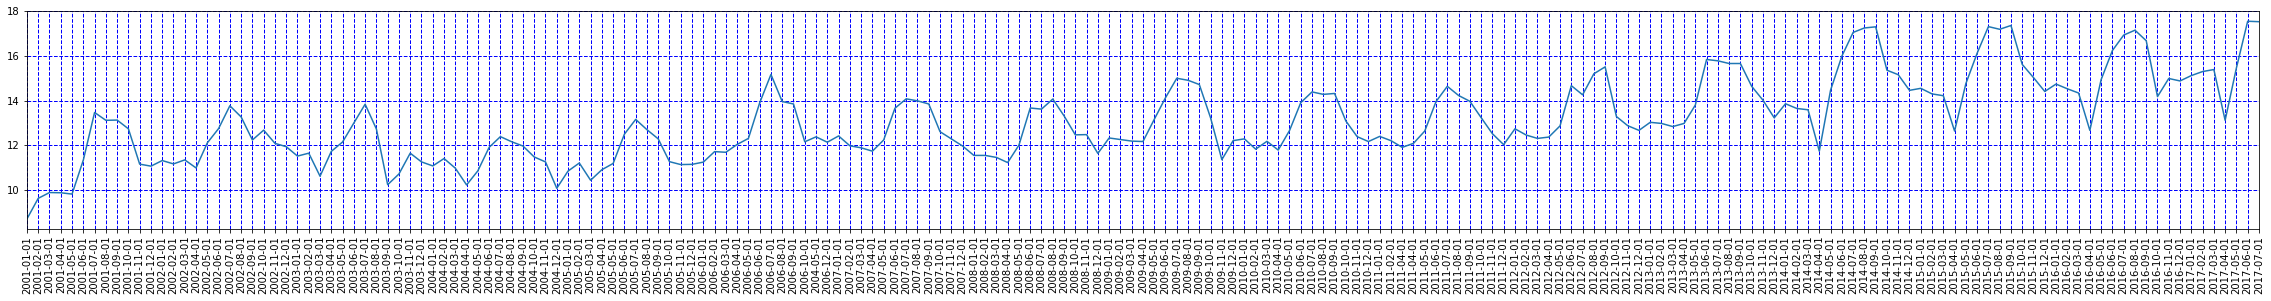

In [18]:
plt.figure(figsize = (40,4))
data['Price'].plot()
plt.grid(color='b', linestyle='--', linewidth=1)
plt.xticks(range(len(data['Price'])),data['Month'].map(lambda x: x.date()),rotation=90)
plt.show()

In [19]:
data_test.head()

,AllFuelsGen,CoalGen,PetroleumGen,NatGasGen,OtherGasGen,NuclearGen,HydroGen,RenewablesGen,HydroStorageGen,OtherGen,GeothermalGen,IndepGen,GDP,AvgTemp,AvgMaxTemp,AvgRelHum,Price,HydroCons,GeoCons,SolarCons,WindCons,WoodCons,WasteCons,BiofuelsCons,BiomassCons,RenCons,NatGasPrice,ResNatGasPrice,CommNatGasPrice,IndNatGasPrice,ElecPowerNatGasPrice,ElecPowerElecNetGen,CommElecNetGen,IndElecNetGen,TotElecNetGen,ElecImports,ElecExports,ElecNetImports,TDLosses,RetailElecSales,DirectElecUse,EndElecUse,ResPrice,CommPrice,IndPrice,AvgRetailPrice,ResNatGasCons,CommNatGasCons,IndLPNatGasCons,OtherIndNatGasCons,OtherNonCHPIndNatGasCons,TotIndOtherNatGasCons,TotIndNatGasCons,PDTransNatGasCons,FuelTransNatGasCons,TotTransNatGasCons,ElecPowerNatGasCons,TotNatGasCons,ElecCoalCons,ElecNatGasCons,TotRetailElecSales,TotCoalCons,CA_GDP,CoalCap,LargeHydroCap,NatGasCap,NuclearCap,OilCap,BiomassCap,GeothermalCap,SmallHydroCap,SolarPVCap,SolarThermalCap,WindCap,TotalElecCap,Month
168,14246.53,27.13,4.49,9167.54,180.38,1563.70,853.66,2468.95,-85.22,65.91,1042.15,971.14,2149.70,60.23,67.68,44.10,14.55,224.95,18.09,21.03,141.30,181.77,43.15,163.14,388.06,793.42,4.48,9.50,8.15,4.90,4.31,346.76,0.98,12.72,360.46,6.04,0.82,5.22,23.80,329.67,12.21,341.88,12.10,10.31,6.67,10.18,937.95,532.63,132.61,103.48,614.84,718.32,850.93,78.80,3.35,82.15,711.32,3114.98,6.15,65809.58,20436.66,56.17,2149.70,101.00,12252.0,44524.00,2393.0,326.0,1287.00,2716.00,1741.00,6081.0,1249.0,5984.00,78742.00,2015-01-01
169,12303.54,24.34,2.70,6836.29,106.79,1526.21,895.99,2930.36,-86.69,67.55,947.89,884.23,2157.49,61.50,72.46,53.99,14.30,207.68,16.61,25.05,139.05,164.08,38.44,157.55,360.07,748.46,4.57,9.08,7.81,4.74,5.02,322.47,0.93,11.07,334.48,5.57,1.36,4.22,21.22,306.77,10.70,317.47,12.29,10.62,6.88,10.36,902.36,517.34,120.37,92.25,567.37,659.62,779.99,74.11,3.02,77.13,648.34,2925.17,5.47,49675.12,18225.23,50.57,2157.49,97.83,12252.0,44366.08,2393.0,326.0,1290.17,2714.17,1741.17,6292.5,1249.0,5955.67,78765.58,2015-02-01
170,14346.53,26.73,2.58,7940.78,108.94,1694.00,899.50,3651.89,-36.26,58.37,1042.56,973.01,2165.28,66.26,77.58,42.27,14.22,226.27,18.38,34.90,142.66,172.17,42.83,175.55,390.55,812.77,4.35,9.28,7.85,4.46,3.71,311.74,0.98,11.48,324.19,6.63,0.94,5.69,13.43,305.35,11.10,316.46,12.33,10.63,6.83,10.29,633.08,385.77,133.86,98.91,562.70,661.61,795.47,64.93,3.35,68.28,708.73,2591.33,6.00,57546.83,19904.83,54.72,2165.28,94.67,12252.0,44208.17,2393.0,326.0,1293.33,2712.33,1741.33,6504.0,1249.0,5927.33,78789.17,2015-03-01
171,14568.68,25.54,4.50,7620.95,103.17,1645.49,981.91,4095.32,31.70,60.10,938.95,879.72,2173.08,62.91,75.13,44.60,12.64,209.41,17.08,39.55,166.50,167.71,41.65,170.20,379.56,812.10,3.93,10.43,8.03,3.96,3.24,282.20,0.93,11.01,294.13,6.53,0.59,5.94,13.96,275.48,10.64,286.12,12.62,10.37,6.61,10.01,319.29,232.20,131.41,92.88,515.05,607.93,739.34,49.58,3.24,52.82,664.28,2007.92,5.65,55643.86,20019.55,51.84,2173.08,91.50,12252.0,44050.25,2393.0,326.0,1296.50,2710.50,1741.50,6715.5,1249.0,5899.00,78812.75,2015-04-01
172,15435.01,26.76,19.99,7420.21,126.45,1696.42,1254.51,4737.98,79.39,73.29,1056.14,983.74,2180.87,60.14,72.29,67.18,14.76,187.55,18.35,42.51,159.83,172.70,42.34,185.12,400.16,808.39,4.25,12.73,8.13,3.58,3.28,309.55,1.01,11.52,322.09,6.62,0.61,6.01,28.83,288.09,11.18,299.27,12.93,10.47,6.74,10.21,177.57,160.51,133.83,95.16,507.68,602.84,736.68,45.56,3.35,48.91,734.49,1858.15,5.83,53831.48,19441.59,56.60,2180.87,88.33,12252.0,43892.33,2393.0,326.0,1299.67,2708.67,1741.67,6927.0,1249.0,5870.67,78836.33,2015-05-01


In [20]:
data1_test = data_test.set_index('Month')
data1_test.to_csv('/Users/negarfazeli/energy-prediction/test_file.csv')

In [21]:
data1_train = data_train.set_index('Month')
data1_train.to_csv('/Users/negarfazeli/energy-prediction/train_file.csv')

In [22]:
data1_train.head()

,AllFuelsGen,CoalGen,PetroleumGen,NatGasGen,OtherGasGen,NuclearGen,HydroGen,RenewablesGen,HydroStorageGen,OtherGen,GeothermalGen,IndepGen,GDP,AvgTemp,AvgMaxTemp,AvgRelHum,Price,HydroCons,GeoCons,SolarCons,WindCons,WoodCons,WasteCons,BiofuelsCons,BiomassCons,RenCons,NatGasPrice,ResNatGasPrice,CommNatGasPrice,IndNatGasPrice,ElecPowerNatGasPrice,ElecPowerElecNetGen,CommElecNetGen,IndElecNetGen,TotElecNetGen,ElecImports,ElecExports,ElecNetImports,TDLosses,RetailElecSales,DirectElecUse,EndElecUse,ResPrice,CommPrice,IndPrice,AvgRetailPrice,ResNatGasCons,CommNatGasCons,IndLPNatGasCons,OtherIndNatGasCons,OtherNonCHPIndNatGasCons,TotIndOtherNatGasCons,TotIndNatGasCons,PDTransNatGasCons,FuelTransNatGasCons,TotTransNatGasCons,ElecPowerNatGasCons,TotNatGasCons,ElecCoalCons,ElecNatGasCons,TotRetailElecSales,TotCoalCons,CA_GDP,CoalCap,LargeHydroCap,NatGasCap,NuclearCap,OilCap,BiomassCap,GeothermalCap,SmallHydroCap,SolarPVCap,SolarThermalCap,WindCap,TotalElecCap
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,16618.89,199.86,263.92,10192.49,97.57,2380.00,1590.10,1717.40,-36.26,18.03,1085.73,1085.78,1638.07,52.22,60.48,51.45,8.71,194.80,14.61,3.10,4.02,175.98,30.81,23.74,230.53,447.07,8.91,10.12,9.50,8.84,9.55,318.74,0.63,13.13,332.49,3.42,1.55,1.87,9.22,310.85,14.29,325.14,7.73,7.25,4.75,6.75,976.68,500.27,95.60,110.93,575.61,686.54,782.14,76.39,1.24,77.62,340.29,2677.00,85.43,94388.27,21744.32,154.43,1638.07,429.0,11848.00,30375.00,4456.0,565.00,1143.00,2625.00,1751.00,2.0,410.00,1534.00,55364.00
2001-02-01,14380.39,184.14,175.65,8870.58,101.84,2229.87,1290.01,1504.66,-172.96,17.30,951.16,951.21,1637.15,50.04,57.29,71.37,9.63,180.55,12.81,3.40,4.46,155.97,27.21,20.08,203.26,404.48,7.08,10.26,9.80,7.21,7.18,270.97,0.55,11.42,282.94,3.32,2.85,0.46,-1.35,272.32,12.43,284.76,8.04,7.51,4.81,6.87,780.48,422.41,86.82,98.42,541.61,640.03,726.85,65.77,1.12,66.89,312.84,2309.46,82.33,82259.19,18305.56,138.33,1637.15,429.0,11836.75,30567.83,4456.0,563.08,1142.67,2624.83,1750.42,2.0,407.33,1534.83,55540.83
2001-03-01,15848.63,102.50,119.55,9474.18,103.13,2468.63,1764.77,1788.32,-152.66,16.49,1052.63,1052.67,1636.24,56.12,67.10,77.43,9.89,211.59,14.21,4.83,5.50,168.14,30.32,21.55,220.01,456.13,6.10,9.85,9.14,6.30,5.91,287.70,0.55,12.45,300.71,3.53,1.79,1.73,19.62,269.32,13.51,282.83,8.32,7.70,4.87,7.01,681.88,375.69,96.44,107.76,557.16,664.92,761.36,63.63,1.24,64.86,362.84,2246.63,43.27,87836.61,21351.41,108.27,1636.24,429.0,11825.50,30760.67,4456.0,561.17,1142.33,2624.67,1749.83,2.0,404.67,1535.67,55717.67
2001-04-01,15841.02,205.59,90.02,9208.77,92.26,2318.67,2096.46,1797.49,-143.87,13.42,966.04,966.08,1635.32,54.87,65.57,72.80,9.88,186.13,13.16,5.37,7.08,163.97,30.12,18.71,212.80,424.53,6.30,10.16,9.01,6.08,5.82,265.86,0.55,11.67,278.08,3.79,1.42,2.38,13.43,254.33,12.70,267.02,8.46,7.73,4.87,7.02,400.73,255.36,92.60,100.58,521.48,622.05,714.66,50.74,1.20,51.93,384.49,1807.17,90.97,84775.23,18855.60,155.97,1635.32,429.0,11814.25,30953.50,4456.0,559.25,1142.00,2624.50,1749.25,2.0,402.00,1536.50,55894.50
2001-05-01,16874.50,200.48,103.19,9698.87,108.04,1667.93,3045.22,1831.97,34.61,16.19,960.34,960.37,1634.40,66.45,81.29,72.58,9.82,198.14,12.98,6.32,6.56,161.46,29.83,19.58,210.86,434.87,5.77,11.14,9.19,5.46,5.29,288.17,0.58,11.75,300.49,4.42,1.55,2.87,26.11,264.44,12.80,277.25,8.83,7.77,5.00,7.17,209.33,164.15,94.98,103.46,473.07,576.53,671.51,42.24,1.24,43.47,433.92,1522.38,86.68,87603.94,19862.26,149.68,1634.40,429.0,11803.00,31146.33,4456.0,557.33,1141.67,2624.33,1748.67,2.0,399.33,1537.33,56071.33


In [23]:
data1_train.columns.tolist()
data1_train.plot(subplots=True, figsize=(15, 80)); # Plotting Individual Columns


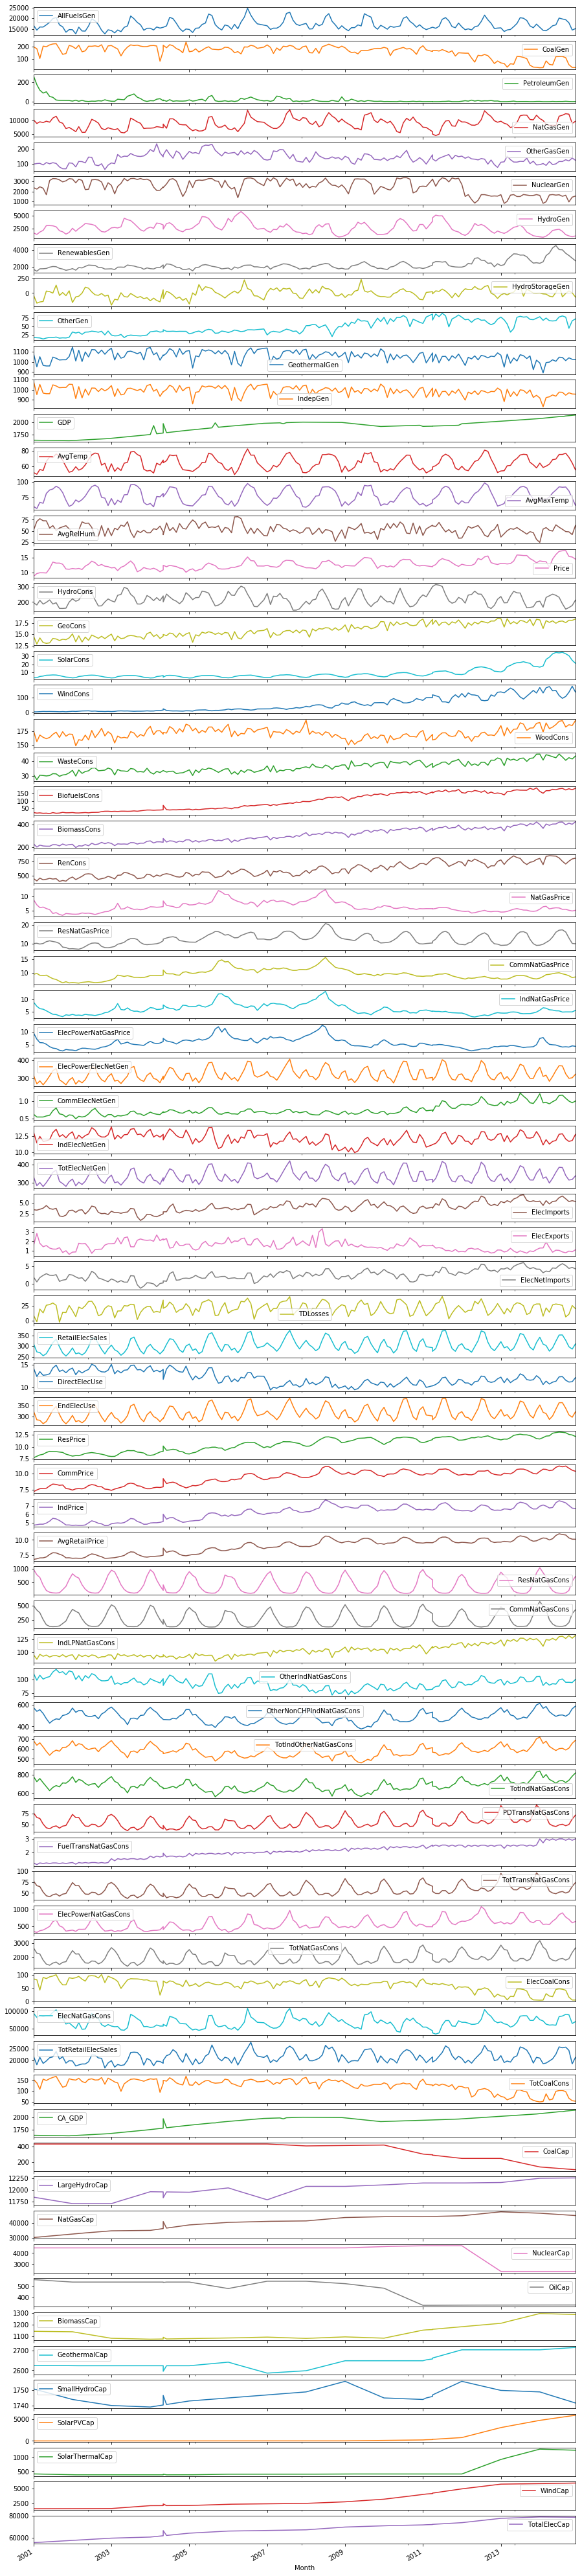

In [24]:
plt.show()

### AR model

/Library/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Lag: 14
Coefficients: [  3.52821632e+03   3.85706124e-01   1.17343411e-01  -3.69130964e-02
  -9.11583925e-03   5.19767106e-02  -1.11997382e-01   4.35727616e-02
  -4.40721842e-02  -5.30416210e-03  -5.19139562e-02   1.41397576e-01
   6.31764352e-01  -1.14250419e-01  -2.07870800e-01]
predicted=14944.195334, expected=14246.530000
predicted=14087.071696, expected=12303.540000
predicted=13985.433773, expected=14346.530000
predicted=14923.204542, expected=14568.680000
predicted=16317.595123, expected=15435.010000
predicted=17202.605683, expected=18726.650000
predicted=19477.819207, expected=20370.900000
predicted=19771.438326, expected=20851.430000
predicted=19274.082831, expected=19034.020000
predicted=17742.627223, expected=17230.290000
predicted=15188.976764, expected=14125.990000
predicted=15202.815676, expected=15464.280000
predicted=15122.902241, expected=14894.440000
predicted=14471.545206, expected=13474.900000
predicted=14242.863751, expected=14329.870000
predicted=15006.612477, expe

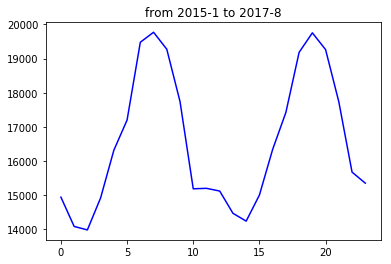

In [25]:
from pandas import Series
train = Series.from_csv('/Users/negarfazeli/energy-prediction/train_file.csv', header=0)
test = Series.from_csv('/Users/negarfazeli/energy-prediction/test_file.csv', header=0)


from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('final.csv', header=0)
# split dataset
# X = series.values
train, test = train.values, test.values
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
pyplot.plot(predictions, color='blue')
pyplot.title('from 2015-1 to 2017-8')
pyplot.show()

In [26]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA


### p,d,q parameters

* p: The number of lag observations included in the model.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.